<a href="https://colab.research.google.com/github/SylGrafe/RepoDl04/blob/master/lab2LoadW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

lab2loadW  load  weights  from h5 file
must be run on CPU or GPU BUT not TPU


---


**See lab2Sygr0003.pdf  for instructions and comments**


Using TensorFlow backend.


Cloning into 'RepoDl04'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 86 (delta 33), reused 66 (delta 17), pack-reused 0
Unpacking objects: 100% (86/86), done.


DEBUG initData() fname RepoDl04/jena_climate_2009_2016.csv
getData () will read  RepoDl04/jena_climate_2009_2016.csv
TPU not found
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
modelStruct ggdd loadweights  from file RepoDl04/ggdd_1204_1153.h5
theModel.evaluate_generator on testGen  , steps=50 , returns one mae
 mae from evaluate_generator  0.3226
WARNING minIdex :24050 DOES NOT BELONG to test data 
DEBUG plotTemp()  RepoDl04/ggdd_1204_1153 at  28.06.2009 00:10 mae:0.09 , realMae:0.82

Resulting  naive mae:1.8823 


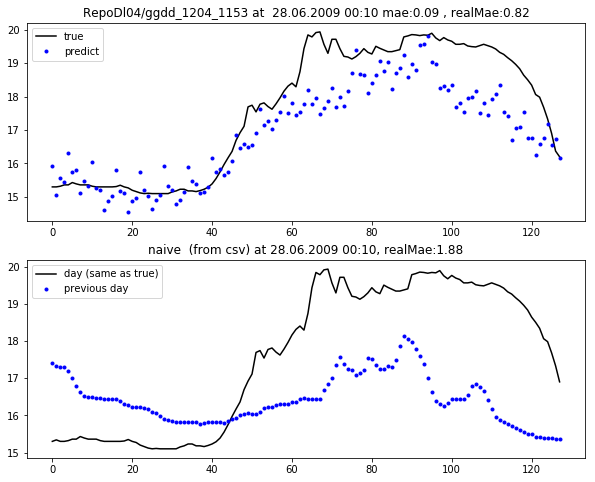

WARNING minIdex :37050 DOES NOT BELONG to test data 
DEBUG plotTemp()  RepoDl04/ggdd_1204_1153 at  26.09.2009 06:50 mae:0.13 , realMae:1.16

Resulting  naive mae:1.5180 


<Figure size 432x288 with 0 Axes>

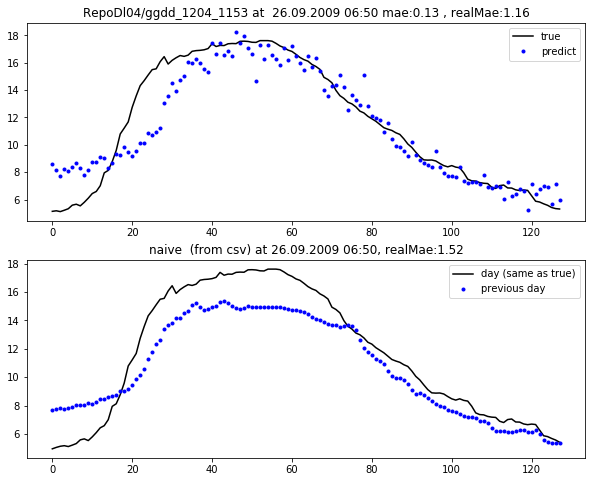

WARNING minIdex :50050 DOES NOT BELONG to test data 
DEBUG plotTemp()  RepoDl04/ggdd_1204_1153 at  25.12.2009 13:50 mae:0.23 , realMae:2.02

Resulting  naive mae:3.0416 


<Figure size 432x288 with 0 Axes>

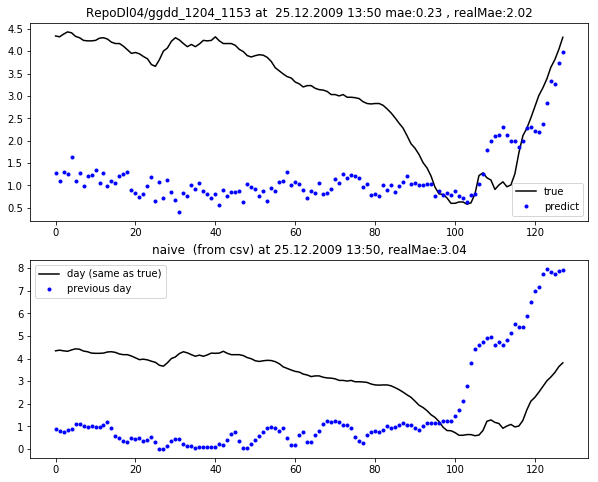

WARNING minIdex :70050 DOES NOT BELONG to test data 
DEBUG plotTemp()  RepoDl04/ggdd_1204_1153 at  13.05.2010 11:10 mae:0.16 , realMae:1.37

Resulting  naive mae:2.3827 


<Figure size 432x288 with 0 Axes>

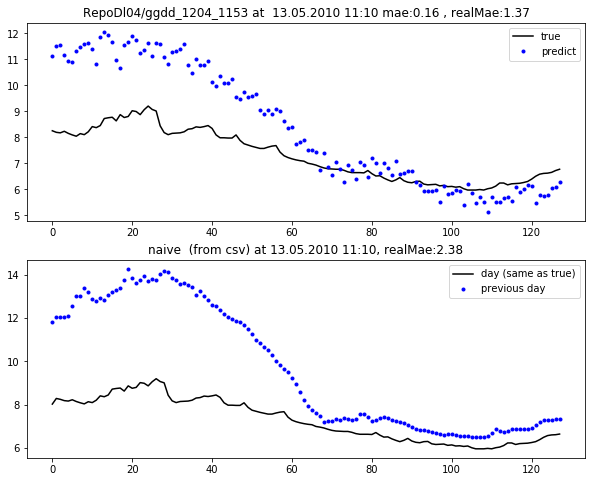

<Figure size 432x288 with 0 Axes>

In [1]:
# -*- coding: utf-8 -*-
"""
test load weights
https://keras.io/getting-started/faq/
Saving/loading only a model's weights
If you need to save the weights of a model, you can do so in HDF5 with the code below:
model.save_weights('my_model_weights.h5')
Assuming you have code for instantiating your model, you can then load the weights 
you saved into a  model with the same architecture
"""

#!/usr/bin/env python
# coding: utf-8
# from 6.3-advanced-usage-of-recurrent-neural-networks.py
#  study data  + run simply fully-connected model  and evaluate_naive_method ()


import os
import sys
import datetime
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics    
from keras import models
get_ipython().system('git clone https://github.com/SylGrafe/RepoDl04.git')
sys.path.insert(0, "RepoDl04")

import lab2U00
import lab2MakeModels
import lab2JsonUtils




#  MANDATORY init data generator and retrieve TPU address
TpuAddress = lab2U00.initData (doRunLocal=False)



######################## define the main parameters and variables
startTime= datetime.datetime.now()
myLr=0.001
optimizerStr = 'rmsprop  , lr=%s ' % myLr
lossStr = 'mae'
theDumpFileName = "63_m0_local.json"
compInfoStr= optimizerStr + ", " + lossStr

codeRef="63_m0_local"
infoStr="no more info"
modelStruct="no Struct yet"
theWeightsFilename="no name yet"
inputBS=128



############################ function plotTemp ()
def plotTemps (  modelRef , myMinIndex=300001  , plotNaive=True ):
# evaluate  the model with evaluate_generator ()
# and predict   with predict_generator ()
# using  the  data referenced by myMinIndex
# plot the true labels , pred_labels but also the temp direclty extracted from the file
# corresponding to the true values and teh values one day before
# id plotNaive is True a second plot with 2 curves is made with temp extracted direcly from the # csv file   one curve starts at myMinIndex (should be identi to true labels curves ) and the second plot the temp one day before as would naive model prediction do.
 

# send a warning if the data do not come from the test data set
  if myMinIndex < 300000:
    print ( "WARNING minIdex :%d DOES NOT BELONG to test data " %  myMinIndex)
  
  # in pratcie I do only use one TestBatch
  nbOftestBatches=1
  
  #  evaluate
  # print ("DEBUG theModel.evaluate_generator on testGen  , steps=50 , returns one mae"  )
  evalMae= theModel.evaluate_generator(lab2U00.getGenXYZ(theMinIndex=myMinIndex), 
                                       steps=nbOftestBatches)
  """
  print ("DEBUG plotTemp()  mae from evaluate_generator(theminIndex=%d , steps=%d)   %.4f" % (
    myMinIndex , nbOftestBatches ,  evalMae) )
  """


  
  # run predictions on test data  (above myMinIndex)  for  nbOftestBatches batches
  
  # print ("DEBUG DEBUG theModel.predict_generator(.. steps= %d),  " % nbOftestBatches )
  predRes= theModel.predict_generator(lab2U00.getGenXYZ(theMinIndex=myMinIndex), 
                                      steps=nbOftestBatches )
  """
  print (" DEBUG  %d testBatches gives predRes.shape %s " % ( nbOftestBatches , predRes.shape   ))
  
  print( "DEBUG predRes[0][0]: %.2f , " % ( predRes[0][0]))  
  """
  # select a batch among the  nbOftestBatches produced
  choosenBatch=0
 
  if (choosenBatch >= nbOftestBatches ):
    print ("FATAL ERROR , pgm exit choosen batch  must be less than nbOftestBatches")
    sys.exit(1)

  # get the data and labels from lab2U00.getGenXYZ() for the  choosenBatch batch

  batchCounter=0
  for data_batch, labels_batch in lab2U00.getGenXYZ(theMinIndex=myMinIndex):
    batchCounter+=1
    if (batchCounter >= choosenBatch):
      # print ("DEBUG break lab2U00.getGenXYZ after %d batches" % (batchCounter))
      break
  

  trueTemp = lab2U00.realTemp(labels_batch)
  limit = choosenBatch*128
  predTemp =lab2U00.realTemp(predRes[limit:limit+128 ])

  realMae = sklearn.metrics.mean_absolute_error(trueTemp,  predTemp )
  #print ("\nDEBUG plotTemp() eval_mae:%.2f  realMae:%.2f " %  (evalMae , realMae) )


  # get the corresponding firstTargetIndice     for this batch
  firstTargetInd=  lab2U00.getIndiceXYZ ( myMinIndex , choosenBatch )
  # print (" DEBUG firstTargetInd=%d" %  (firstTargetInd ) )


  # retrieve also the temperature for the predicted values and the previous day  from the file   
  firstDate , csvTempDay2 , csvTempDay1 = lab2U00.readTempsInFile (firstTargetInd , 128,  -2)

  xVals = range(len(trueTemp))

  # show also the corresponding maes
  theTitle1 = "%s at  %s mae:%.2f , realMae:%.2f" %  ( 
       modelRef ,firstDate[:-3] , evalMae  ,realMae) 

  if plotNaive:
    # plt.figure(  modelRef , figsize=(10, 8))
    # want new figure for each plot
    plt.figure(  figsize=(10, 8))
    # plot true temp  vs pred temp
    ax = plt.subplot(2, 1, 1)
    
    plt.plot(xVals, trueTemp,color="black", label='true')
    plt.plot(xVals, predTemp, 'b.', label='predict')
    print ("DEBUG plotTemp() " , theTitle1)
    plt.title(theTitle1)
    plt.legend()
    
  
    # plt.figure(  figsize=(10, 8))
    # plot the values from the csv file  
    ax = plt.subplot(2, 1, 2)
    
    plt.plot(xVals, csvTempDay2, color="black", label='day (same as true)')
    plt.plot(xVals, csvTempDay1, 'b.', label='previous day')
    # for fun get the mae also
    naiveMae = sklearn.metrics.mean_absolute_error(csvTempDay2, csvTempDay1 )
    print ("\nResulting  naive mae:%.4f " % naiveMae )
    theTitle2 = "naive  (from csv) at %s, realMae:%.2f" %  (( firstDate[:-3]  , naiveMae)  )
    #print ("DEBUG plotTemp() " , theTitle2)
    plt.title(theTitle2)
    plt.legend()
    # must use bloack=False otherwise the pgm do not manage to save the figure !! 
    plt.show(block=False)
  
    doSaveFig= True
    if doSaveFig:
      theFigName  =  modelRef + "__"+ firstDate[0:10] +  ".png"
      #print ("DEBUG plotTemp() saving " , theFigName)
      plt.savefig (theFigName)

  else:  
    # do not plot naive model
    plt.figure(  figCounter ,  figsize=(10, 4))
    #plt.figure(  modelRef , figsize=(10, 4))
    # plot true temp  vs pred temp
    # ax = plt.subplot(2, 1, 1)
    
    plt.plot(xVals, trueTemp,color="black", label='true')
    plt.plot(xVals, predTemp, 'b.', label='predict')
    plt.title(theTitle1)
    plt.legend()
    
    # must use bloack=False otherwise the pgm do not manage to save the figure !! 
    plt.show(block=False)
    
    doSaveFig= True
    if doSaveFig:
      theFigName  =  modelRef + "_1_"+ firstDate[0:10] +  ".png"
      #print ("DEBUG plotTemp() saving " , theFigName)
      plt.savefig (theFigName)
  

################################3
########## main
#####################################3


# IMPORTANT IMPORTANT IMPORTANT IMPORTANT IMPORTANT IMPORTANT 
# the parameters modelStruct u1 u2 d1 d2 must be the same 
# for  the model to be created  as in the model from which the weights
# were saved
myUnits1 = 32 
myUnits2 = 64
myD1=64
myD2 =128
modelStruct="ggdd"
theWeightsFilename = 'RepoDl04/ggdd_1204_1153.h5'
tSLen1 =  lab2U00.getTSLen()
nbOfFeat1 = lab2U00.getFeatNb()

# create a model  
modelStruct="ggdd"
if modelStruct == "dense":    
    model=lab2MakeModels.makeDenseModel (tSLen1 , nbOfFeat1, batch_size = inputBS, lrPar=myLr )
elif modelStruct == "gru1":    
    model=lab2MakeModels.makeGRU1Model (tSLen1 , nbOfFeat1, batch_size = inputBS,  lrPar=myLr)
elif modelStruct == "gru2":    
    model=lab2MakeModels.makeGRU2Model (tSLen1 , nbOfFeat1, batch_size = inputBS,  lrPar=myLr)
elif modelStruct == "grugru":    
    model=lab2MakeModels.makeGRUGRUModel (tSLen1 , nbOfFeat1, batch_size = inputBS,  
        lrPar=myLr , u1=myUnits1 , u2=myUnits2  , d1=myD1)
    infoStr="u1:%d, u2:%d , d1:%d" % (myUnits1 , myUnits2 , myD1)
elif modelStruct == "ggdd":    
    model=lab2MakeModels.makeGGDDModel (tSLen1 , nbOfFeat1, batch_size = inputBS,  
        lrPar=myLr , u1=myUnits1 , u2=myUnits2  , d2=myD2 ,  d1=myD1)
    infoStr="u:%d:%d , d:%d,%d" %    (myUnits1 , myUnits2 , myD1 , myD2)    
elif modelStruct == "lldd":    
    model=lab2MakeModels.makeLLDDModel (tSLen1 , nbOfFeat1, batch_size = inputBS,  
        lrPar=myLr , u1=myUnits1 , u2=myUnits2  , d2=myD2 ,  d1=myD1)
    infoStr="u1:%d:%d , d:%d,%d" %    (myUnits1 , myUnits2 , myD1 , myD2)    

elif modelStruct == "lstmlstm":    
    model=lab2MakeModels.makeLSTMLSTMModel (tSLen1 , nbOfFeat1, batch_size = inputBS,  
        lrPar=myLr , u1=myUnits1 , u2=myUnits2)
    infoStr="u:%d,%d " % (myUnits1 , myUnits2  )
elif modelStruct == "gggdd":  
    myU3=64
    model=lab2MakeModels.makeGGGDDModel (tSLen1 , nbOfFeat1, batch_size = inputBS,  
        lrPar=myLr , u1=myUnits1 , u2=myUnits2 ,u3=myU3 , d2=myD2 ,  d1=myD1)
    infoStr="u:%d,%d,%d , d:%d,%d " %    (myUnits1 , myUnits2, myU3,  myD1 , myD2)    


else:  
  print (" \n***** EXIT  , %s invalid modeStruct" % (modelStruct))  
  sys.exit(1)



# remember cannot load weight on TPU so you should not run  this notebook on TPU
if (TpuAddress): 
  print ("Must run on GPU or CPU  because of loadweights ")
  sys.exit(1)
theModel = model
  



print ("modelStruct %s loadweights  from file %s" % (
      modelStruct ,  theWeightsFilename ) )
theModel.load_weights(theWeightsFilename)

 



if True:
  
  print ("theModel.evaluate_generator on testGen  , steps=50 , returns one mae"  )
  testRes= theModel.evaluate_generator(lab2U00.getTestGen() , steps=1)
  print (" mae from evaluate_generator  %.4f" % ( testRes) )
  
  
# code to plot tempreature predictions  
if True:
  # if  plotNaive True a subplot with naive prediction will be added
  myPlotNaive=True
  figCounter=0

  
  myMinIndex=24050
  plotTemps (theWeightsFilename[:-3] , myMinIndex, plotNaive=myPlotNaive)
  figCounter+=1
  myMinIndex=37050
  plotTemps (theWeightsFilename[:-3] , myMinIndex , plotNaive=myPlotNaive)
  figCounter+=1
  myMinIndex=50050
  plotTemps (theWeightsFilename[:-3] , myMinIndex , plotNaive=myPlotNaive)
  figCounter+=1
  myMinIndex=70050
  plotTemps (theWeightsFilename[:-3] , myMinIndex, plotNaive=myPlotNaive)
  figCounter+=1



  
  


In [4]:

      
!ls RepoDl04/  
import lab2U00

dense_1304_1333.h5  gggdd_2504_1622.h5		lab2Sygr0003.pdf
dense_1704_1817.h5  gggdd_2604_1456.h5		lab2U00.py
ggdd_1204_0858.h5   grugru1004_2058.h5		lldd_1204_1233.h5
ggdd_1204_0937.h5   grugru_1104_1947.h5		lldd_1204_1314.h5
ggdd_1204_1002.h5   grugru_1104_2032.h5		lldd_1204_1346.h5
ggdd_1204_1011.h5   grugru_1104_2136.h5		lldd_1504_1730.h5
ggdd_1204_1058.h5   grugru_1504_1604.h5		lldd_1704_1639.h5
ggdd_1204_1153.h5   grugru_1504_1705.h5		lstmlstm_1504_2013.h5
ggdd_1804_1653.h5   jena_climate_2009_2016.csv	__pycache__
ggdd_2204_1643.h5   lab2JsonUtils.py		results.json
gggdd_2204_1731.h5  lab2_M00.ipynb
gggdd_2204_1845.h5  lab2MakeModels.py
DEBUG initData() fname /home/syl1/doNotBackup/RepoDl04/jena_climate_2009_2016.csv
getData () will read  /home/syl1/doNotBackup/RepoDl04/jena_climate_2009_2016.csv


FileNotFoundError: ignored

In [0]:


if True:

  myMinIndex=26000
  plotTemps ( theWeightsFilename[:-3]  , myMinIndex)




In [4]:
!ls RepoDl04/lab2*.*



RepoDl04/lab2JsonUtils.py  RepoDl04/lab2MakeModels.py  RepoDl04/lab2U00.py
RepoDl04/lab2_M00.ipynb    RepoDl04/lab2Sygr0003.pdf


end notebook